<a href="https://colab.research.google.com/github/MANI-WEBDEVE/learn-python/blob/main/SVM_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import make_circles

In [3]:
X,Y= make_circles(100, factor=.1, noise=.08)

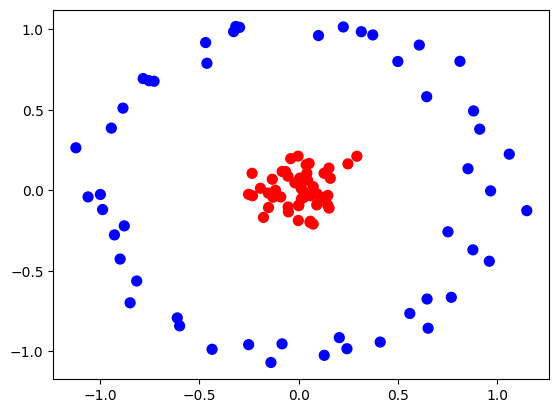

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='bwr')

In [5]:
X_train, Xtest, Y_train, Ytest = train_test_split(X,Y, random_state=0, test_size=.22)



```
Alternative methods:
Y_train.flatten() - Same kaam karta hai
Y_train.reshape(-1) - Also same result deta hai
Minglish tip:
ravel() = flat kar do ya 1D banado matlab!
```



In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, Y_train.ravel())
Y_pred=classifier.predict(Xtest)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Y_pred)

0.4090909090909091

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, Y, clf):
    X_set, y_set = X, Y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/tmp/ipython-input-3812680254.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


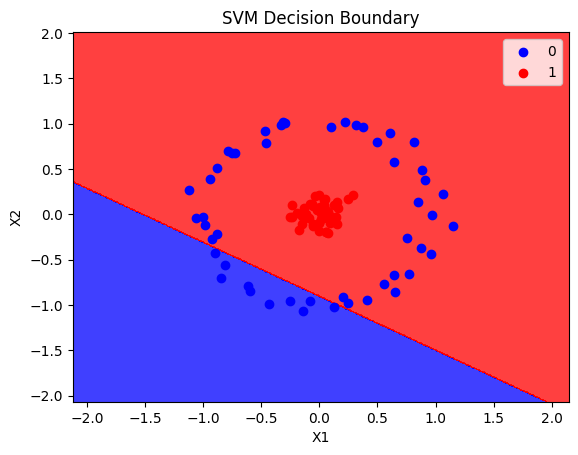

In [9]:

plot_decision_boundary(X, Y, classifier)

In [13]:
classifier=SVC(kernel="rbf")
classifier.fit(X_train, Y_train.ravel())
Y_pred_rbf=classifier.predict(Xtest)

/tmp/ipython-input-3812680254.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


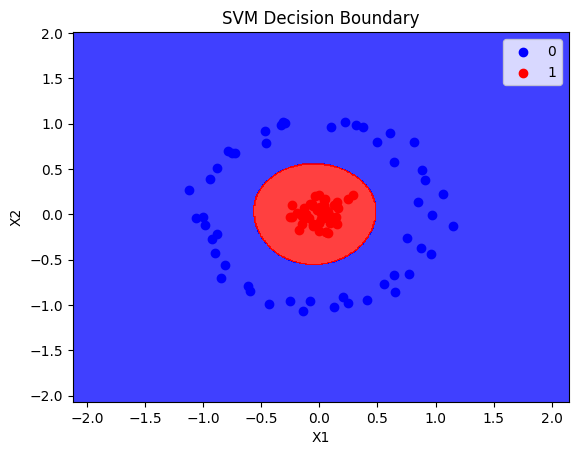

1.0


In [15]:
plot_decision_boundary(X, Y, classifier)
print(accuracy_score(Ytest, Y_pred_rbf))

/tmp/ipython-input-223895926.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


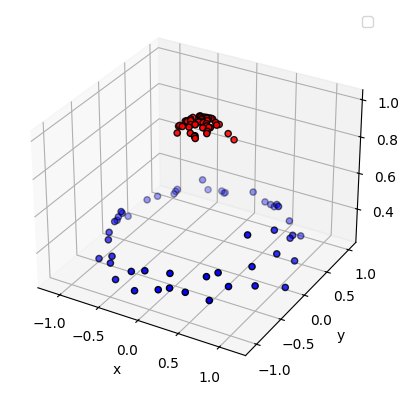

In [21]:
# visulize the data in 3D
def ThreeD_view(x,y):
  r=np.exp(-(x**2).sum(1))
  ax=plt.subplot(projection='3d')
  ax.scatter3D(x[:,0], x[:,1], r, c=y, cmap='bwr', edgecolor='k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  return

ThreeD_view(X,Y)

In [24]:
# let check the polynomial kernel
classifier=SVC(kernel="poly", degree=2) # default degree value is 3
classifier.fit(X_train, Y_train.ravel())
Y_pred_poly=classifier.predict(Xtest)

/tmp/ipython-input-3812680254.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


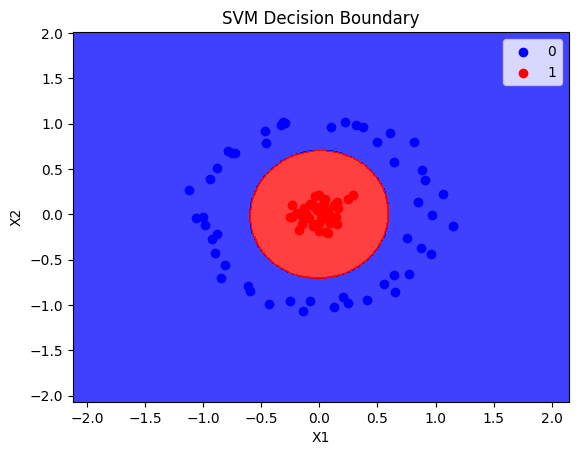

1.0


In [25]:
plot_decision_boundary(X, Y, classifier)
print(accuracy_score(Ytest, Y_pred_poly))

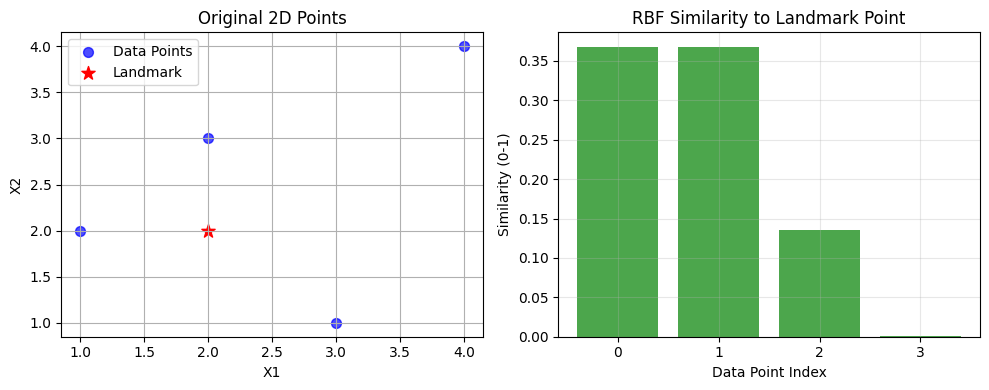

In [30]:
# rbf algorithm code demo
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Sample 2D data points
X = np.array([[1, 2], [2, 3], [3, 1], [4, 4]])
# Support vector (landmark point)
landmark = np.array([[2,2]])

# RBF kernel function
def rbf_kernel(X, landmark, gamma=1.0):
    # Calculate squared Euclidean distance
    distances = cdist(X, landmark, 'sqeuclidean')
    # Apply RBF: exp(-gamma * ||x - x'||²)
    return np.exp(-gamma * distances)

# Calculate similarities
similarities = rbf_kernel(X, landmark, gamma=1.0)

# Visualization
plt.figure(figsize=(10, 4))

# Plot 1: Original points
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.7, label='Data Points')
plt.scatter(landmark[0, 0], landmark[0, 1], c='red', s=100, marker='*', label='Landmark')
plt.title('Original 2D Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

# Plot 2: Similarity values
plt.subplot(1, 2, 2)
points = range(len(X))
plt.bar(points, similarities.flatten(), color='green', alpha=0.7)
plt.title('RBF Similarity to Landmark Point')
plt.xlabel('Data Point Index')
plt.ylabel('Similarity (0-1)')
plt.xticks(points)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()